In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [8]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

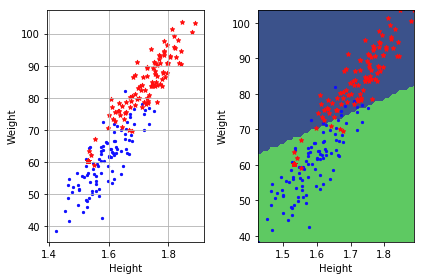

In [9]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [10]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1.0 / (1 + np.exp(-t))

In [11]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    #return np.sum([np.log(1 + np.exp(tx[n].T @ w)) - y[n] * tx[n].T @ w for n in range(tx.shape[0])])
    return np.squeeze(-(y.T @ np.log(sigmoid(tx @ w)) + (1 - y).T @ np.log(1 - sigmoid(tx @ w))))
    
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))
calculate_loss(y, tx, w)

array(138.62943611198907)

In [12]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w) - y)

calculate_gradient(y, tx, w)

array([[ -2.        ],
       [ 68.74603697],
       [ 79.61302092]])

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [14]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma * gradient
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198907
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.5458928087594
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.96487063560558
Current iteration=500, loss=40.92008945871305
Current iteration=600, loss=40.904187443189905
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.8961649660955
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.89502196411899
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328359
Current iteration=1500, loss=40.894827272895505
loss=40.89482664256953


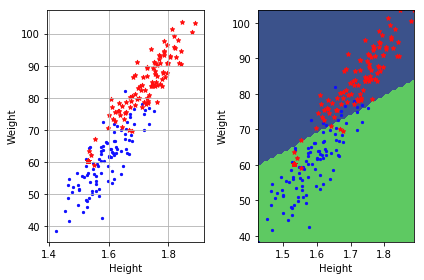

In [15]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [16]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # compute S matrix
    N = tx.shape[0]
    S = np.zeros((N,N))
    for n in range(N):
        sig = sigmoid(tx[n].T @ w)
        S[n,n] = sig * (1 - sig)
    H = tx.T @ S @ tx
    # FIXME check for faster solution
    return H

calculate_hessian(y, tx, w)

array([[  5.00000000e+01,  -7.79376563e-14,   7.69384556e-14],
       [ -7.79376563e-14,   5.00000000e+01,   4.60676209e+01],
       [  7.69384556e-14,   4.60676209e+01,   5.00000000e+01]])

Write a function below to return loss, gradient, and hessian.

In [17]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [18]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # We are not given gamma, so we assume that we should move to the position of the minimum
    w = w - np.linalg.inv(hessian) @ gradient
    return loss, w

demo

Current iteration=0, the loss=138.62943611198907
Current iteration=1, the loss=63.411553739095936
Current iteration=2, the loss=47.30458619935064
Current iteration=3, the loss=41.99746742248449
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.89482560989058


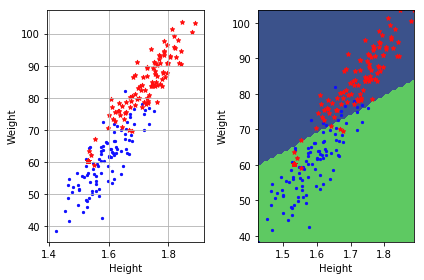

In [19]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [20]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w) + lambda_ / 2 * np.squeeze(w.T @ w) # FIXME factor 2 difference solution
    gradient = calculate_gradient(y, tx, w) + lambda_ * w
    #hessian = calculate_hessian(y, tx, w) + lambda_ # FIXME not sure with this one
    return loss, gradient

lambda_ = 0.1
penalized_logistic_regression(y, tx, w, lambda_)

(138.62943611198907, array([[ -2.        ],
        [ 68.74603697],
        [ 79.61302092]]))

In [114]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    # FIXME it is not specified whether to use Newton method or not.
    w = w - gamma * gradient # FIXME don't use hessian?
    return loss, w

learning_by_penalized_gradient(y, tx, w, 0.8, lambda_)

(138.62943611198907, array([[  1.6       ],
        [-54.99682957],
        [-63.69041673]]))

Current iteration=0, loss=138.62943611198907
Current iteration=100, loss=44.83540395392496
Current iteration=200, loss=43.4996038644251
Current iteration=300, loss=43.281106589451525
Current iteration=400, loss=43.23721998641895
Current iteration=500, loss=43.22766656533492
Current iteration=600, loss=43.2255120270352
Current iteration=700, loss=43.22501811224864
Current iteration=800, loss=43.224904006615475
Current iteration=900, loss=43.22487754807194
Current iteration=1000, loss=43.22487140204023
loss=41.223299860188874


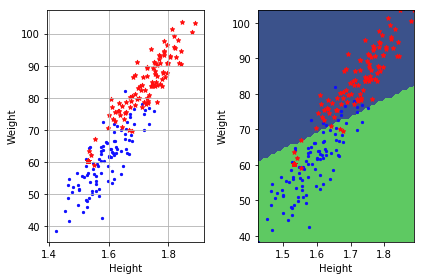

In [115]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)